In [1]:
from simulations.pixel_array import pixelarrayQPC
from optimization.trajectory_optimization import trajectory_func_to_optimize
from optimization.cma2 import optimize_cma
from lossfunctions.staircasiness import staircasiness
from datahandling.datahandling import datahandler
import numpy as np
from functools import partial

D:\Anaconda\envs\qcodes\lib\site-packages\kwant\solvers\default.py:18: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  "Performance can be very poor in this case.", RuntimeWarning)


In [2]:
start=-7
stop=2
steps=100

# Parameters for QPC
disorder=0.3
outer_gates=-13
B_field=0
energy=3

# Parameters for optimization algorithm
# bounds=(-1,1)
# pfactor=0.001

# Initialize loss function
stairs=staircasiness(delta=0.05,last_step=20)

# Set common voltage sweep
common_voltages=np.linspace(start,stop,steps)


# Initialize QPC instance and set parameters
QPC=pixelarrayQPC(plot=False)

QPC.U0=disorder
QPC.energy=energy
QPC.V1=outer_gates
QPC.V11=outer_gates
QPC.phi=B_field

dat=datahandler('fourier_modes',QPC=QPC)

In [3]:
order=3
start_point=np.zeros(shape=(order,8)).ravel()
kwargs={'common_mode':common_voltages,'QPC_instance':QPC,'order':order,'loss_function':stairs.stairLossFunk2,'bounds':(-9,4),'pfactor':0.001}
actual_func_to_minimize=partial(trajectory_func_to_optimize,**kwargs)
result=optimize_cma(actual_func_to_minimize,dat,start_point,maxfevals=99999,sigma=0.5,stop_time=100)

data saved to:
C:/Users/Torbjørn/Google Drev/UNI/MastersProject/EverythingkwantRL/saved_data/outcmaes/93/
(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 16 (seed=477581, Mon Dec 13 09:30:06 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     12 2.215518395715046e+01 1.0e+00 4.77e-01  5e-01  5e-01 3:04.4
termination on timeout=100 (Mon Dec 13 09:33:26 2021)
final/bestever f-value = 2.307943e+01 2.215518e+01
incumbent solution: [-0.05281136 -0.60897181  0.38131033  0.00567069  0.40930373  0.10747691
 -0.21089347 -0.27540867 ...]
std deviations: [0.47057267 0.48421682 0.47392377 0.46834387 0.476729   0.47711798
 0.47148476 0.47184083 ...]


In [4]:
import json
with open(dat.data_path+f'outcmaes/{result[2]}/datadict.txt','rb') as file:
    results_dict=json.load(file)


In [5]:
losses=[]
xs=[]
voltages=[]
staircases=[]
times=[]
for key in range(len(results_dict['measurements'])):
    losses.append(results_dict['measurements'][str(key)]['loss'])
    voltages.append(results_dict['measurements'][str(key)]['voltages'])
    staircases.append(results_dict['measurements'][str(key)]['staircase'])
    xs.append(results_dict['measurements'][str(key)]['x'])
    times.append(results_dict['measurements'][str(key)]['time_for_voltages'])

[-0.18103588117778247, -0.8957451041541763, 0.4912294480731952, 0.10033179669912068, 0.40519869892593063, 0.22896800199019793, -0.1716268275943332, -0.2636045738581827, 0.39620550211905686, -0.35914078399925276, -0.1671431741175094, -0.08846661210464515, -0.4614826151376963, 0.0760859562037209, 0.2716953811073437, 0.43688645365795503]


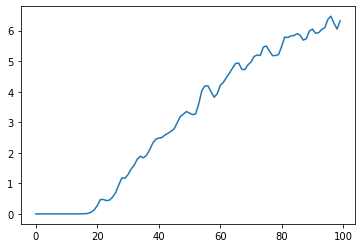

In [6]:
import matplotlib.pyplot as plt
plt.plot(staircases[np.argmin(losses)])
print(xs[np.argmin(losses)])


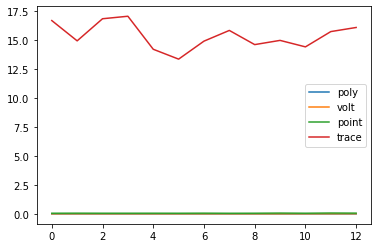

In [7]:
times=np.array(times)
poly_time=times[:,0]
volt_time=times[:,1]
new_point_time=times[:,2]
trace_time=times[:,3]

plt.figure()
plt.plot(poly_time,label='poly')
plt.plot(volt_time,label='volt')
plt.plot(new_point_time,label='point')
plt.plot(trace_time,label='trace')
plt.legend()

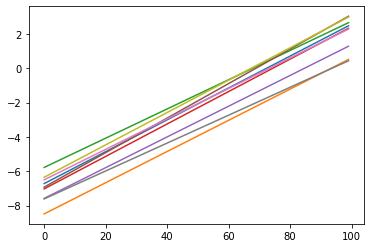

In [8]:
array_voltages=np.array(voltages[np.argmin(losses)])
plt.figure()
for i in range(9):
    plt.plot(array_voltages[:,i])